<a href="https://colab.research.google.com/github/Adarsh-59/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## <a name="p1">Importing Dependencies</a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
import sklearn
import xgboost as xgb

In [ ]:
# Importing the classes
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## <a name="p2">Exploratory Data Analysis</a>

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading the data
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Credit Card Fraud Detection Project/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking the shape, the datatypes and null/non-null distribution
print("Shape : " + str(df.shape))
print("Info : ")
print(df.info())

Shape : (284807, 31)
Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

In [ ]:
# Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


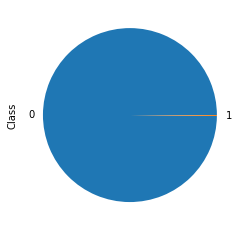

In [ ]:
# Checking the class distribution of the target variable
print(df['Class'].value_counts())
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

Bar Chart : 


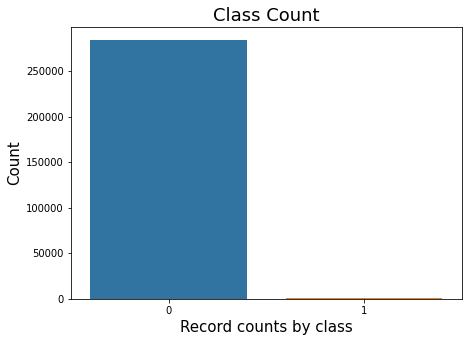

In [ ]:
# Create a bar plot for the number fraudulent and non-fraudulent transcations
print("Bar Chart : ")
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [ ]:
# Checking the numerical correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


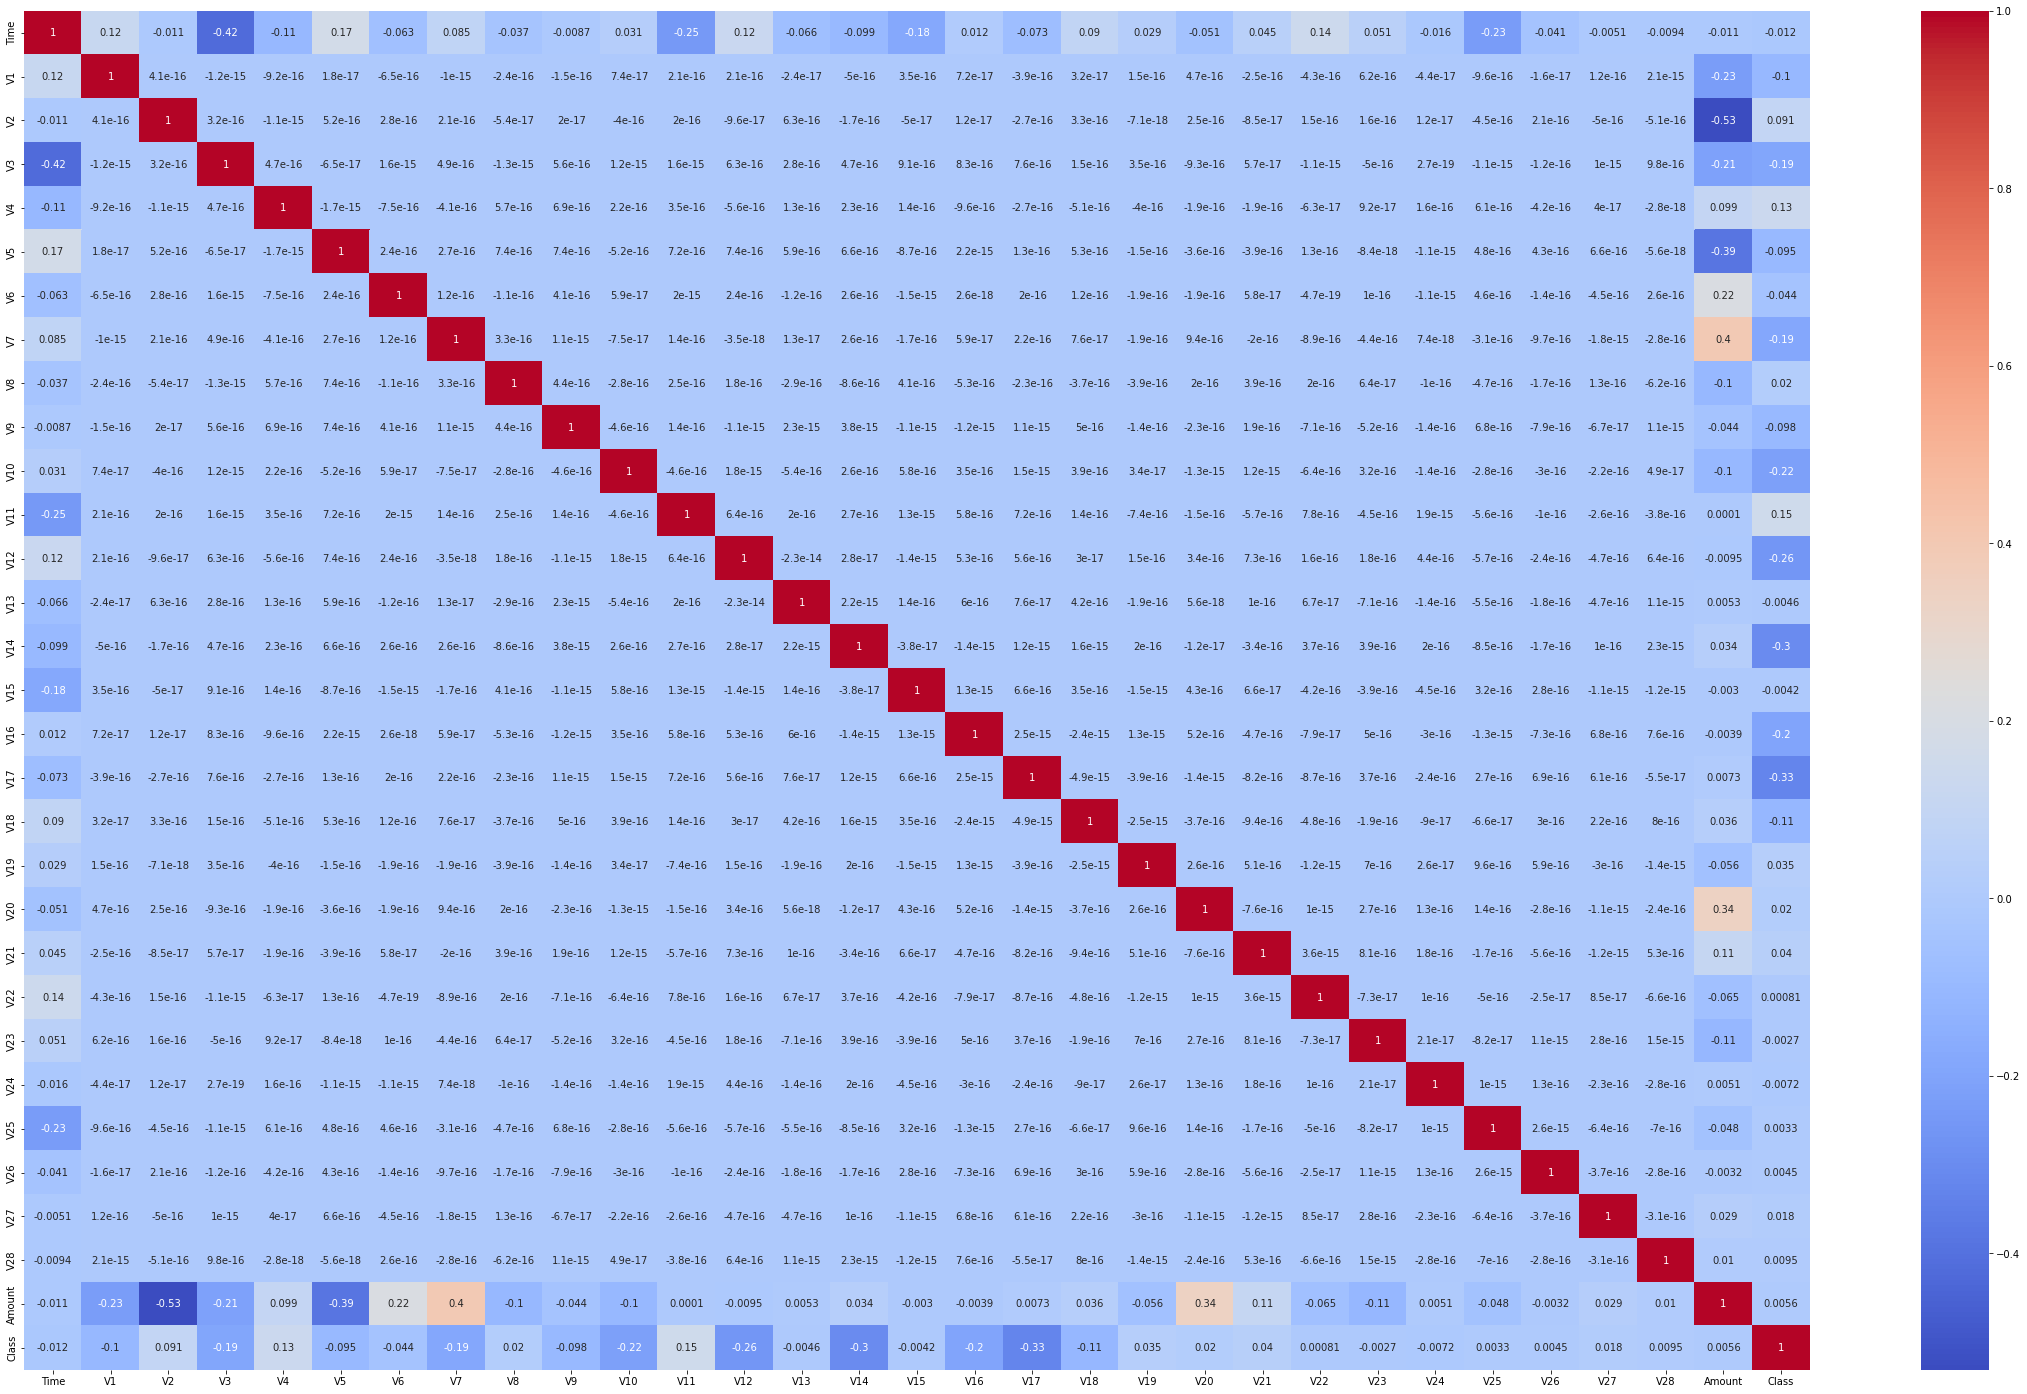

In [ ]:
# Checking the correlation in heatmap
plt.figure(figsize=(40,25))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

We can observe the distribution of our classes from this plot.

In [ ]:
# Checking the % distribution of legit vs fraud transactions
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Legit transactions percentage : " + str(normal_share))
print("Fraud transcations percentage : " + str(fraud_share))

Legit transactions percentage : 99.82725143693798
Fraud transcations percentage : 0.1727485630620034


In [ ]:
# As time is given in relative fashion, we are using time duration as the difference between two times.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived column 'Time_Hour'
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)

In [ ]:
# Drop unnecessary columns
# We will drop the column 'Time', as we have derived the 'Time_Hour' from the 'Time' column
df.drop('Time', axis = 1, inplace= True)

## <a name="p3">Splitting the data into Legit and Fraud Transactions</a>

In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
legit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [ ]:
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,0
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,2


In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## <a name="p3">Splitting the data into Train & Test data</a>

In [ ]:
# Splitting the dataset into X and y
y = df['Class']
X = df.drop(['Class'], axis=1)

In [ ]:
# Checking initial 5 rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking initial 5 rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [ ]:
# Checking initial 5 rows of X_train
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,0.77,13
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,36.14,10
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,179.95,15
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,181.06,14
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,8.20,13


In [ ]:
# Checking initial 5 rows of y_train
y_train.head()

201788    0
179369    0
73138     0
208679    0
206534    0
Name: Class, dtype: int64

In [ ]:
# Checking initial 5 rows of X_test
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99,12
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99,4
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16,14
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99,19
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27,13


In [ ]:
# Checking initial 5 rows of y_test
y_test.head()

49089     0
154704    0
67247     0
251657    0
201903    0
Name: Class, dtype: int64

In [ ]:
# Checking the distribution of data after split
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0    284315
1       492
Name: Class, dtype: int64
0    227449
1       396
Name: Class, dtype: int64
0    56866
1       96
Name: Class, dtype: int64


In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

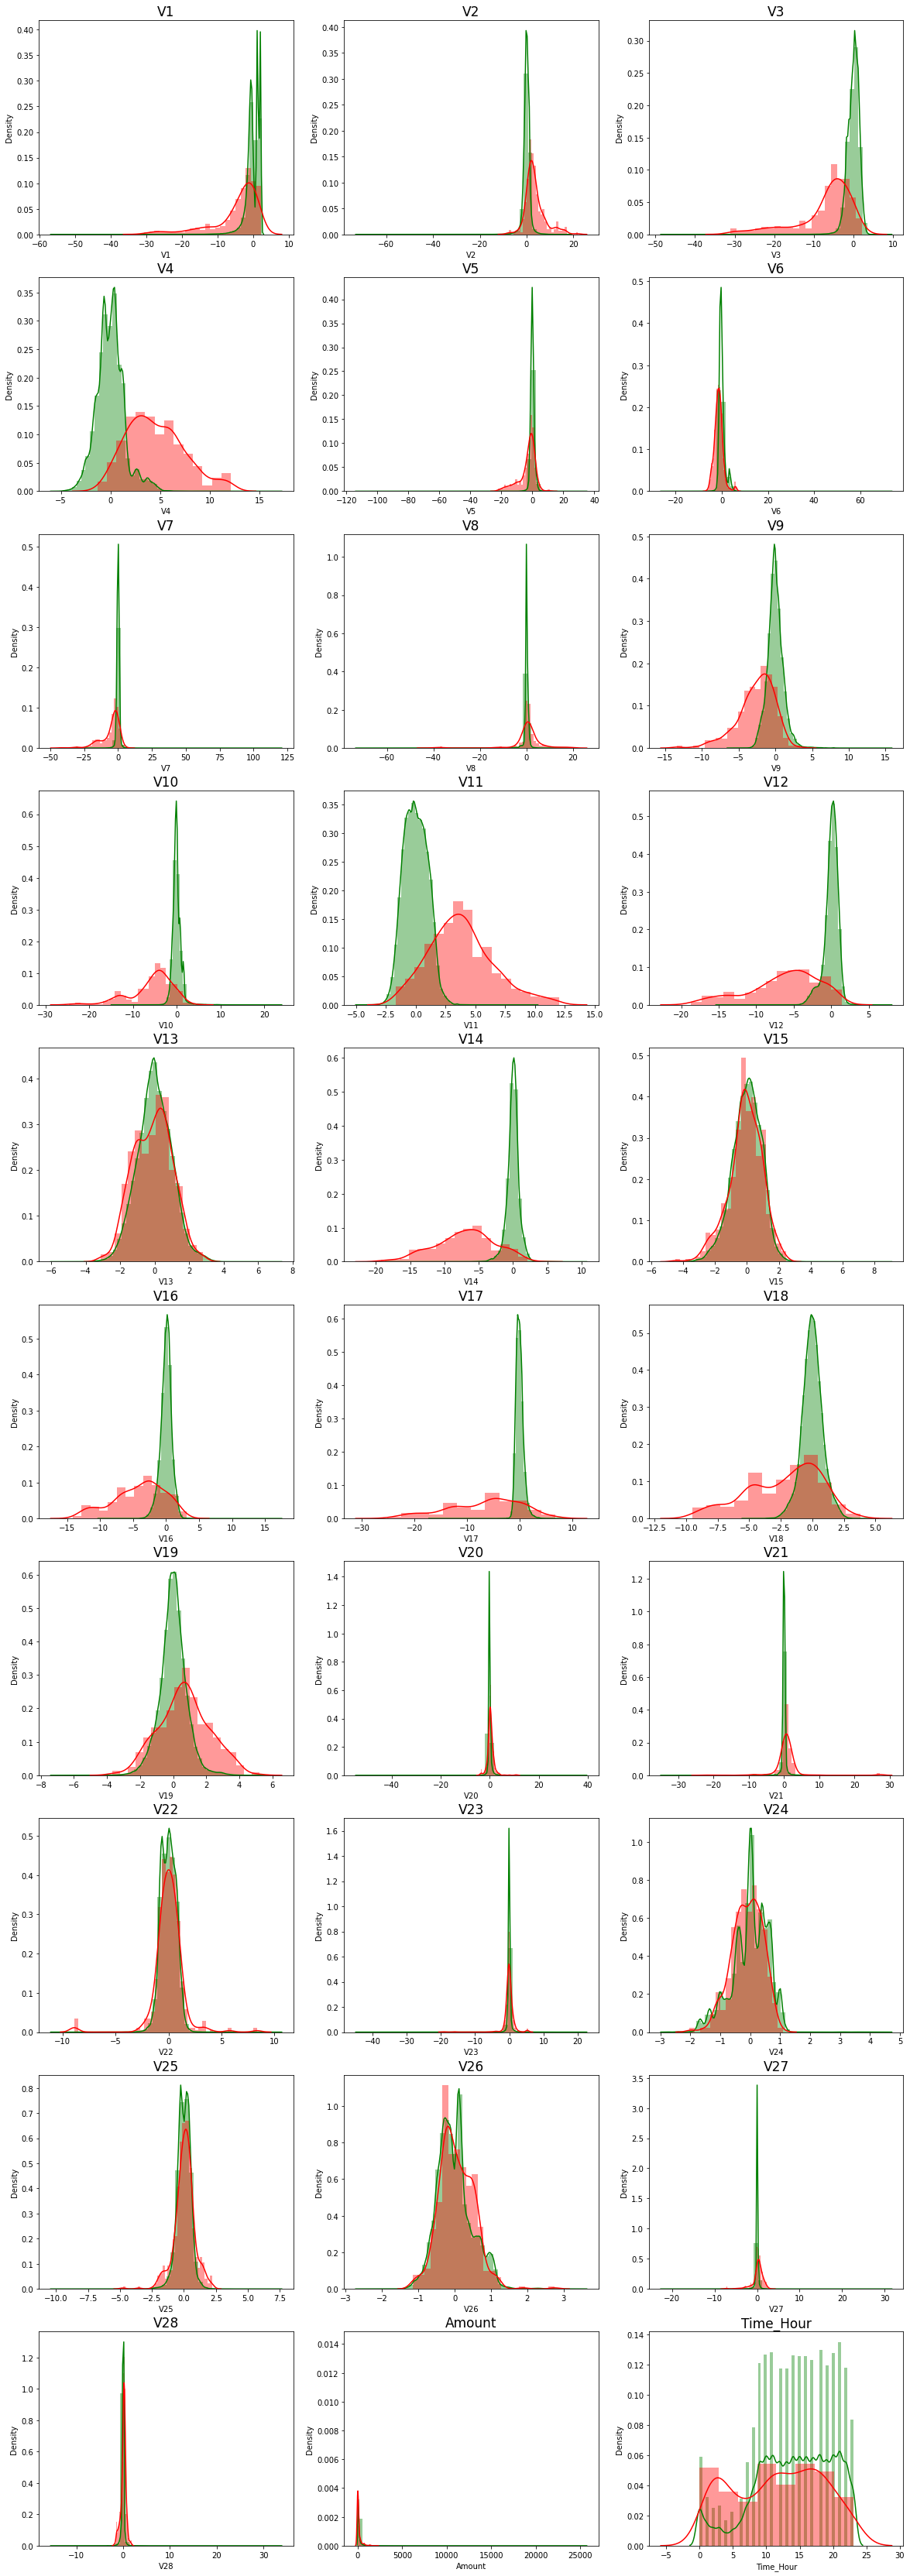

In [ ]:
# Plotting the histograms of variables to see skewness
legit_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate (cols):
  plt.subplot(10, 3, n+1)
  sns.distplot(X[col][legit_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)

plt.show()

## <a name="p4">Model building</a>

In [ ]:
# Dataframe to store results
df_Results = pd.DataFrame(columns=['Method','Model','Accuracy','ROC_value','Threshold'])

In [ ]:
# Function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Legit','Fraud']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
# Function to fit and predict on Logistic Regression model
def buildAndRunLogisticModel(df_Results, Method, X_train,y_train, X_test, y_test ):

  from sklearn.linear_model import LogisticRegressionCV
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  LR_CV= LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,solver='newton-cg'
          ,tol=10
      )

  LR_CV.fit(X_train, y_train)
  print ('Max ROC_AUC:', LR_CV.scores_[1].mean(axis=0).max())

  print("Parameters for regularisations")
  print(LR_CV.coef_)
  print(LR_CV.intercept_)
  print(LR_CV.scores_)

  # Predicted values
  y_pred = LR_CV.predict(X_test)

  # Predicted probabilities
  y_pred_probs = LR_CV.predict_proba(X_test)[:,1]

  # Accuracy
  Accuracy = accuracy_score(y_pred, y_test)
  print("Accuarcy of Logistic Regression model : {0}".format(Accuracy))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  # ROC AUC
  roc_value = roc_auc_score(y_test, y_pred_probs)
  print("ROC_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Threshold: {0}".format(threshold))

  roc_auc = auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, AUC="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Method': Method,'Model': 'Logistic Regression ','Accuracy': Accuracy,'ROC_value': roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
# Function to fit and predict on KNN model
def buildAndRunKNNModel(df_Results, Method, X_train, y_train, X_test, y_test):

  # Creation and fitting of KNN model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("KNN model score : " + str(score))

  # Predicted values
  y_pred = knn.predict(X_test)

  # Predicted probabilities
  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Accuracy
  KNN_Accuracy = accuracy_score(y_pred, y_test)
  print("Accuarcy of KNN model : {0}".format(KNN_Accuracy))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  # ROC AUC
  roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN ROC_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, AUC=" + str(roc_auc))
  plt.legend(loc = 4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Method': Method,'Model': 'KNN','Accuracy': score,'ROC_value': roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
# Function to fit and predict on a Decision Tree model
def buildAndRunTreeModel(df_Results, Method, X_train, y_train, X_test, y_test ):

  # Creation and fitting of KNN model with train dataset
  dt = DecisionTreeClassifier(random_state=42)
  dt.fit(X_train, y_train)
  score = dt.score(X_test, y_test)
  print("Decision Tree model score : " + str(score))

  # Predicted values
  y_pred = dt.predict(X_test)

  # Predicted probabilities
  tree_probs = dt.predict_proba(X_test)[:, 1]

  # Accuracy
  DT_Accuracy = accuracy_score(y_pred, y_test)
  print("Accuarcy of Decision Tree model : {0}".format(DT_Accuracy))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  # ROC AUC
  tree_roc_value = roc_auc_score(y_test, tree_probs)
  print("Decision Tree ROC_value: {0}" .format(tree_roc_value))
  fpr, tpr, thresholds = roc_curve(y_test, tree_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Decision Tree threshold: {0}".format(threshold))

  roc_auc = auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, AUC="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Method': Method,'Model': 'Decision Tree','Accuracy': score,'ROC_value': tree_roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
# Function to fit and predict on Random Forest model
def buildAndRunRandomForestModel(df_Results, Method, X_train,y_train, X_test, y_test ):

  # Create the model with 100 trees
  RF = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF.fit(X_train, y_train)
  score = RF.score(X_test, y_test)
  print('Random Forest Model score : {0}'.format(score))


  # Actual class predictions
  rf_pred = RF.predict(X_test)

  # Probabilities for each class
  rf_probs = RF.predict_proba(X_test)[:, 1]

  # Accuracy
  RF_Accuracy = accuracy_score(rf_pred, y_test)
  print("Accuarcy of Decision Tree model : {0}".format(RF_Accuracy))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_pred)
  print("Classification Report")
  print(classification_report(y_test, rf_pred))


  # ROC AUC
  roc_value = roc_auc_score(y_test, rf_probs)
  print("Random Forest ROC_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))

  roc_auc = auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, ROC="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Method': Method,'Model': 'Random Forest','Accuracy': score,'ROC_value': roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
# Function to fit and predict on a SVM model
def buildAndRunSVMModel(df_Results, Method, X_train,y_train, X_test, y_test ):

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Accuracy
  SVM_Score = accuracy_score(y_test,y_pred)
  print("Accuracy of SVM model : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))

  # ROC AUC
  roc_value = roc_auc_score(y_test, svm_probs)
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))

  roc_auc = auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Method': Method,'Model': 'SVM','Accuracy': SVM_Score,'ROC_value': roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### <a name="p4-1">Cross validation with RepeatedKFold</a>

In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      6     11 ... 284795 284798 284803]
TRAIN: [     0      2      3 ... 284802 284803 284805] TEST: [     1      4     30 ... 284793 284804 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     20     21 ... 284781 284783 284799]
TRAIN: [     0      1      3 ... 284803 284804 284806] TEST: [     2      7      8 ... 284796 284801 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      9     10 ... 284797 284800 284802]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      6      7 ... 284791 284802 284804]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     3     12     26 ... 284785 284797 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    18     20     22 ... 284796 284799 284800]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     10     11 ... 284788 284801 284803]
TRAIN: [     1     

Logistic Regression Model
Max ROC_AUC: 0.9817533796388302
Parameters for regularisations
[[ 6.99877486e-04  4.25908758e-02 -7.35347648e-02  2.33650426e-01
   7.79717987e-02 -5.10378105e-02 -3.88079199e-02 -1.12847177e-01
  -7.92820931e-02 -1.66095082e-01  1.31946566e-01 -1.94856411e-01
  -3.98472900e-02 -3.71324618e-01 -4.82457098e-03 -9.37938955e-02
  -7.35159480e-02 -1.48593508e-03  9.60838560e-03 -1.32625538e-02
   4.40153227e-02  2.28379314e-02 -1.36542399e-02 -5.38692139e-03
  -9.00340731e-03  8.90308856e-03 -9.53616693e-03 -6.02570878e-04
   3.19683540e-04  1.06208273e-02]]
[-7.55703074]
{1: array([[0.55809733, 0.56056641, 0.58434914, 0.76233344, 0.92188509,
        0.94858022, 0.98686091, 0.99019027, 0.98240879, 0.97073532,
        0.96733187, 0.96733187, 0.96733187, 0.96733187, 0.96733187,
        0.96733187, 0.96733187, 0.96733187, 0.96733187, 0.96733187],
       [0.56819489, 0.56997823, 0.59086632, 0.74130188, 0.87050361,
        0.90093932, 0.94978115, 0.96036717, 0.95813472

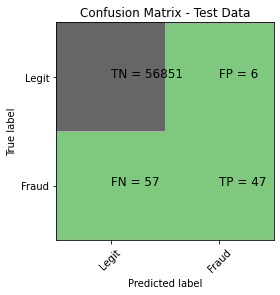

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.89      0.45      0.60       104

    accuracy                           1.00     56961
   macro avg       0.94      0.73      0.80     56961
weighted avg       1.00      1.00      1.00     56961

ROC_value: 0.9924165348695309
Threshold: 0.0015405907288051283
ROC for the test dataset 99.2%


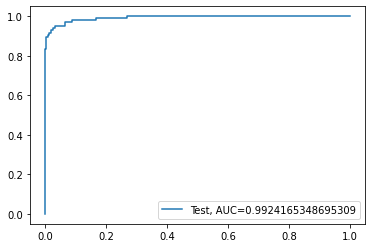

Time Taken by Model: --- 301.23062658309937 seconds ---
------------------------------------------------------------
KNN Model
KNN model score : 0.9991397622934991
Accuarcy of KNN model : 0.9991397622934991
Confusion Matrix


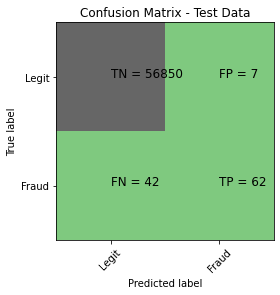

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.90      0.60      0.72       104

    accuracy                           1.00     56961
   macro avg       0.95      0.80      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC_value: 0.874745904367367
KNN threshold: 0.2
ROC for the test dataset 87.5%


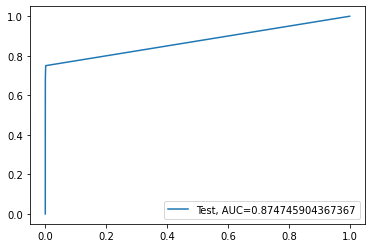

Time Taken by Model: --- 1394.462687253952 seconds ---
------------------------------------------------------------
Decision Tree Model
Decision Tree model score : 0.9991046505503766
Accuarcy of Decision Tree model : 0.9991046505503766
Confusion Matrix


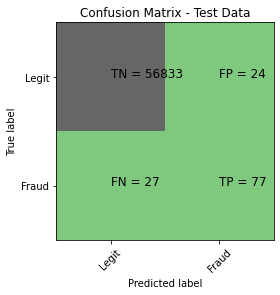

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.76      0.74      0.75       104

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.88     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree ROC_value: 0.8699812518856349
Decision Tree threshold: 1.0
ROC for the test dataset 87.0%


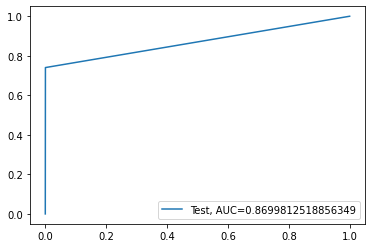

Time Taken by Model: --- 26.84341835975647 seconds ---
------------------------------------------------------------
Random Forest Model
Random Forest Model score : 0.9995435473394076
Accuarcy of Decision Tree model : 0.9995435473394076
Confusion Matrix


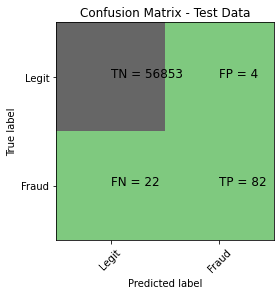

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.95      0.79      0.86       104

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC_value: 0.9555007096075038
Random Forest threshold: 0.02
ROC for the test dataset 95.6%


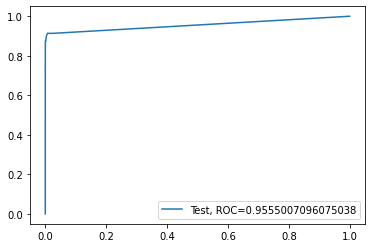

Time Taken by Model: --- 270.09463763237 seconds ---
------------------------------------------------------------
SVM Model
Accuracy of SVM model : 0.9981741893576307
Confusion Matrix


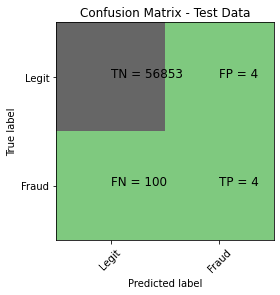

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.50      0.04      0.07       104

    accuracy                           1.00     56961
   macro avg       0.75      0.52      0.54     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.45391085733303926
SVM threshold: 0.004294681813891755
ROC for the test dataset 45.4%


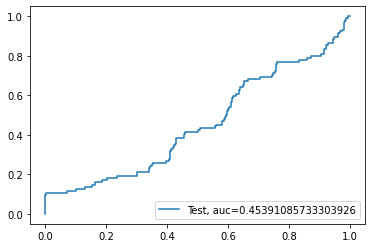

Time Taken by Model: --- 230.99906301498413 seconds ---


In [ ]:
#Run Logistic Regression Model
print("Logistic Regression Model")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Model
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run SVM Model
print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Checking the df_result dataframe containing consolidated results of all the runs
df_Results

,Method,Model,Accuracy,ROC_value,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression,0.998894,0.992417,0.001541
1,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
2,RepeatedKFold Cross Validation,Decision Tree,0.999105,0.869981,1.000000
3,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
4,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004295


### Results for Cross Validation with RepeatedKFold:
Looking at the ROC value, we have "Logistic Regression" model which has provided the best results for cross validation with RepeatedKFold Cross Validation method.

### <a name="p4-2">Cross validation with StratifiedKFold</a>

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression Model
Max ROC_AUC: 0.9825815459373419
Parameters for regularisations
[[ 0.00681531  0.06180145 -0.06724339  0.21871062  0.05423582 -0.0320087
  -0.02285799 -0.11502845 -0.06927204 -0.16370152  0.12808492 -0.19230907
  -0.03680147 -0.36059767  0.00343994 -0.08795401 -0.07265105 -0.00067435
   0.00391777 -0.02819846  0.03819632  0.02339497 -0.01161304 -0.00998604
  -0.00655644  0.00630679 -0.01014783 -0.00168482  0.00040028  0.00048285]]
[-7.43014583]
{1: array([[0.69244071, 0.69420377, 0.71447445, 0.83769026, 0.95579724,
        0.97136042, 0.98915673, 0.99473675, 0.99129968, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226],
       [0.60697436, 0.60862966, 0.6291137 , 0.76881142, 0.90899198,
        0.94877822, 0.96037283, 0.98264317, 0.98536053, 0.98263475,
        0.98263475, 0.97925677, 0.97925677, 0.97925677, 0.97925677,
        0.97925677, 0.97925677, 0.97925677, 0

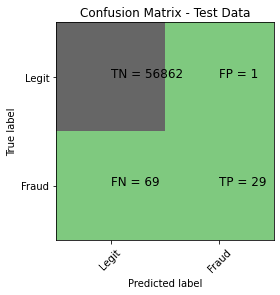

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

ROC_value: 0.9833310423513443
Threshold: 0.001571409441427542
ROC for the test dataset 98.3%


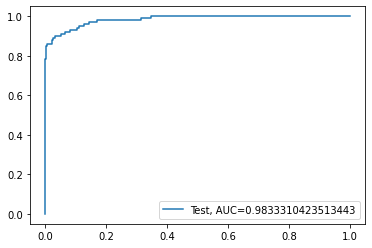

Time Taken by Model: --- 327.1614577770233 seconds ---
------------------------------------------------------------
KNN Model
KNN model score : 0.9991924299081828
Accuarcy of KNN model : 0.9991924299081828
Confusion Matrix


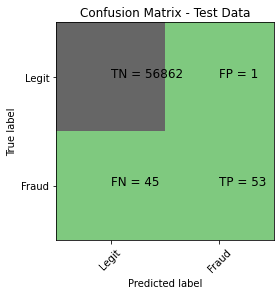

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


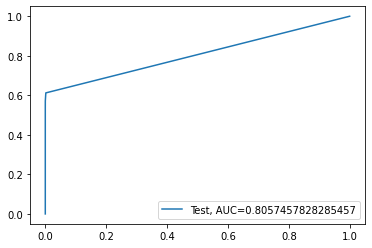

Time Taken by Model: --- 1736.2336692810059 seconds ---
------------------------------------------------------------
Decision Tree Model
Decision Tree model score : 0.998841312476958
Accuarcy of Decision Tree model : 0.998841312476958
Confusion Matrix


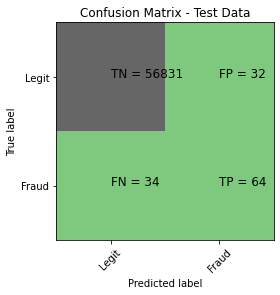

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree ROC_value: 0.8262492341959029
Decision Tree threshold: 1.0
ROC for the test dataset 82.6%


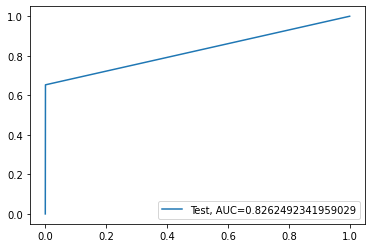

Time Taken by Model: --- 24.950764656066895 seconds ---
------------------------------------------------------------
Random Forest Model
Random Forest Model score : 0.9994382121100402
Accuarcy of Decision Tree model : 0.9994382121100402
Confusion Matrix


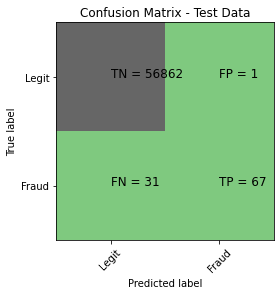

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


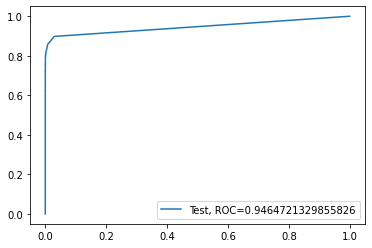

Time Taken by Model: --- 248.55396819114685 seconds ---
------------------------------------------------------------
SVM Model
Accuracy of SVM model : 0.9982795245869981
Confusion Matrix


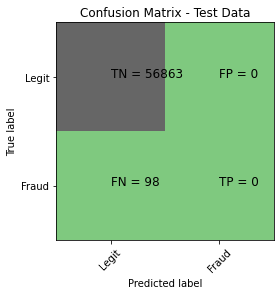

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.0017934719516007583
ROC for the test dataset 40.2%


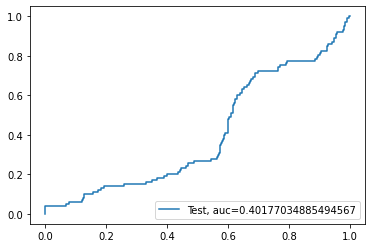

Time Taken by Model: --- 2084.5429949760437 seconds ---


In [ ]:
#Run Logistic Regression Model
print("Logistic Regression Model")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Model
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run SVM Model
print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Checking the df_result dataframe containing consolidated results of all the runs
df_Results

,Method,Model,Accuracy,ROC_value,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression,0.998894,0.992417,0.001541
1,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
2,RepeatedKFold Cross Validation,Decision Tree,0.999105,0.869981,1.000000
3,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
4,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004295
5,StratifiedKFold Cross Validation,Logistic Regression,0.998771,0.983331,0.001571
6,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000
7,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
8,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
9,StratifiedKFold Cross Validation,SVM,0.998280,0.401770,0.001793


### Results for Cross Validation with StratifiedKFold:
Looking at the ROC value, we have "Logistic Regression" model which has provided the best results for cross validation with StratifiedKFold Cross Validation method.

### Conclusion :
- As the results show Logistic Regression model for StratifiedKFold cross validation provided the best results.



### Proceeding with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

Max ROC_AUC: 0.9860374340825115
Parameters for regularisations
[[ 2.09018845e-02  3.27537645e-02 -8.94857686e-02  2.36578714e-01
   8.31215149e-02 -4.89764459e-02 -3.28921153e-02 -1.07913553e-01
  -9.16599156e-02 -1.74660479e-01  1.35531809e-01 -2.08201944e-01
  -4.26170356e-02 -3.76847554e-01 -1.09344610e-02 -1.04439060e-01
  -1.14330342e-01 -8.54328825e-03  1.48846176e-02 -5.64797950e-03
   3.94105684e-02  2.43033949e-02  1.93625358e-03 -1.56901333e-02
  -7.89729934e-03  5.14924767e-03 -3.31614315e-03 -2.37518708e-04
   3.03794061e-04  4.91681676e-03]]
[-7.5018518]
{1: array([[0.582166  , 0.58434192, 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.99602302, 0.99402538, 0.99414382, 0.99498391,
        0.99292154, 0.99292154, 0.99292154, 0.99292154, 0.99292154,
        0.99292154, 0.99292154, 0.99292154, 0.99292154, 0.99292154],
       [0.56185378, 0.56172062, 0.57980386, 0.72096766, 0.88968294,
        0.93991214, 0.97534045, 0.97876629, 0.97971906, 0.98094072,
        0.980

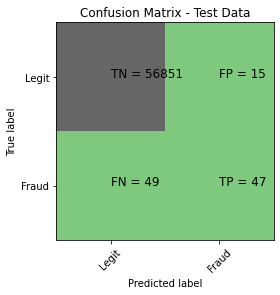

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.76      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.88      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

ROC_value: 0.9754279798121901
Threshold: 0.0013457074089632938


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

BRM= LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,solver='newton-cg'
          ,tol=10
      )

BRM.fit(X_train, y_train)
print ('Max ROC_AUC:', BRM.scores_[1].mean(axis=0).max())

print("Parameters for regularisations")
print(BRM.coef_)
print(BRM.intercept_)
print(BRM.scores_)

# Predicted values
y_pred = BRM.predict(X_test)

# Predicted probabilities
y_pred_probs = BRM.predict_proba(X_test)[:,1]

# Accuracy
Accuracy = accuracy_score(y_pred, y_test)
print("Accuarcy of Logistic Regression model : {0}".format(Accuracy))
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("Classification Report")
print(classification_report(y_test, y_pred))

# ROC AUC
roc_value = roc_auc_score(y_test, y_pred_probs)
print("ROC_value: {0}" .format(roc_value))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold: {0}".format(threshold))

In [ ]:
# Creating a dataframe with the coefficient values
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(BRM.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient Importance']

In [ ]:
coefficients

,Feature,Coefficient Importance
0,V1,0.020902
1,V2,0.032754
2,V3,-0.089486
3,V4,0.236579
4,V5,0.083122
5,V6,-0.048976
6,V7,-0.032892
7,V8,-0.107914
8,V9,-0.091660
9,V10,-0.174660


### Printing the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

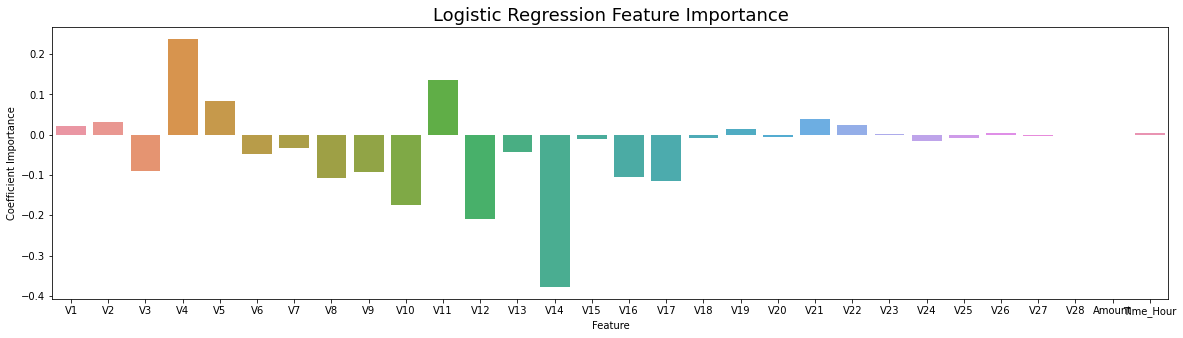

In [ ]:
# Plotting the coefficients values
plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='Coefficient Importance', data=coefficients)
plt.title("Logistic Regression Feature Importance", fontsize=18)

plt.show()

Hence, from the above plot, it can be observed that V4, V5, V11 have most +ve impact whereas V10, V12, V14 seems to have most -ve impact on the predictions.

## <a name="p4-2"> Model building with balancing Classes

Perform class balancing with:
- Random Oversampling
- SMOTE Oversampling
- ADASYN Oversampling

### <a name="p4-3">Oversampling with Random Oversampler with StratifiedKFold Cross Validation</a>

In [ ]:
# Creating the dataset with Random Oversampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  ROS = RandomOverSampler(sampling_strategy=0.5)
  X_train_Random, y_train_Random = ROS.fit_resample(X_train, y_train)

X_train_Random = pd.DataFrame(data=X_train_Random, columns=cols)

Logistic Regression Model
Max ROC_AUC: 0.9864506120909546
Parameters for regularisations
[[ 0.38296664  0.39073182  0.28512458  0.83937189  0.35606683 -0.48068106
  -0.36320377 -0.33054413 -0.227258   -0.67008483  0.29871091 -0.92789581
  -0.31138827 -0.90198561  0.01309215 -0.53783401 -0.30518509 -0.12746581
   0.12558659 -0.72249143  0.07236388  0.53818517  0.14121711 -0.44281791
   0.22265121 -0.1390002  -0.35738292  0.17034255  0.0056435   0.04304603]]
[-5.18522053]
{1: array([[0.63265415, 0.75962471, 0.90557916, 0.95515278, 0.97631572,
        0.9838395 , 0.98514389, 0.9855963 , 0.98586238, 0.98597662,
        0.98598885, 0.98598885, 0.98598885, 0.98598885, 0.98598885,
        0.98598885, 0.98598885, 0.98598885, 0.98598885, 0.98598885],
       [0.62666139, 0.75324874, 0.90245615, 0.95474738, 0.97660157,
        0.98473441, 0.98607044, 0.98634376, 0.98654482, 0.98661948,
        0.98661948, 0.98661948, 0.98661948, 0.98661948, 0.98661948,
        0.98661948, 0.98661948, 0.98661948, 

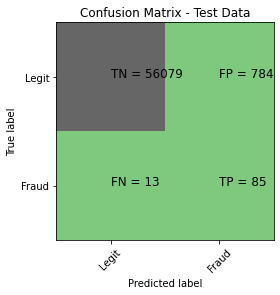

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

ROC_value: 0.9805755832044581
Threshold: 0.42381979148997
ROC for the test dataset 98.1%


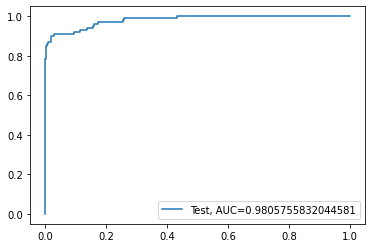

Time Taken by Model: --- 479.42183208465576 seconds ---
------------------------------------------------------------
KNN Model
KNN model score : 0.9980688541282632
Accuarcy of KNN model : 0.9980688541282632
Confusion Matrix


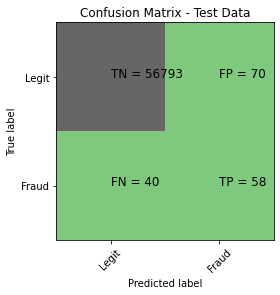

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


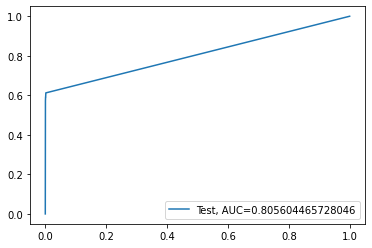

Time Taken by Model: --- 2784.199718952179 seconds ---
------------------------------------------------------------
Decision Tree Model
Decision Tree model score : 0.9990168711925703
Accuarcy of Decision Tree model : 0.9990168711925703
Confusion Matrix


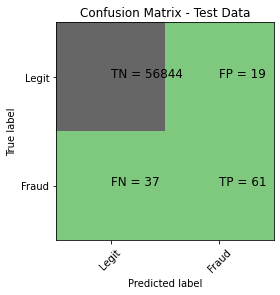

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.62      0.69        98

    accuracy                           1.00     56961
   macro avg       0.88      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree ROC_value: 0.8110574215793277
Decision Tree threshold: 1.0
ROC for the test dataset 81.1%


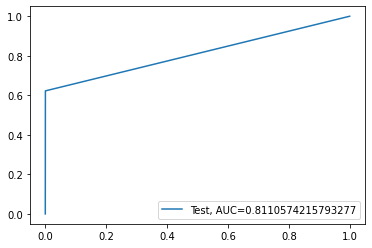

Time Taken by Model: --- 18.01450204849243 seconds ---
------------------------------------------------------------
Random Forest Model
Random Forest Model score : 0.9995084355962852
Accuarcy of Decision Tree model : 0.9995084355962852
Confusion Matrix


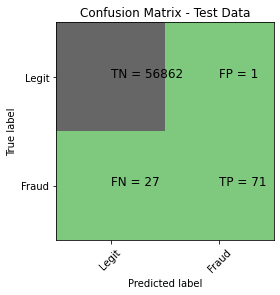

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC_value: 0.9411517011707696
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


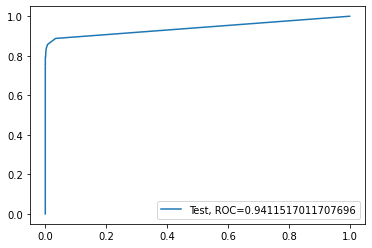

Time Taken by Model: --- 193.282124042511 seconds ---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold CV "

#Run Logistic Regression Model
print("Logistic Regression Model")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results, Data_Imbalance_Handling, X_train_Random, y_train_Random, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results, Data_Imbalance_Handling, X_train_Random, y_train_Random, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Model
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results, Data_Imbalance_Handling, X_train_Random, y_train_Random, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModel(df_Results, Data_Imbalance_Handling, X_train_Random, y_train_Random, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_results dataframe containing consolidated results of all the runs
df_Results

,Method,Model,Accuracy,ROC_value,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression,0.998894,0.992417,0.001541
1,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
2,RepeatedKFold Cross Validation,Decision Tree,0.999105,0.869981,1.000000
3,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
4,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004295
5,StratifiedKFold Cross Validation,Logistic Regression,0.998771,0.983331,0.001571
6,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000
7,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
8,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
9,StratifiedKFold Cross Validation,SVM,0.998280,0.401770,0.001793


### Results for Random Oversampling with StratifiedKFold CV:
Looking at the ROC values, we have "Logistic Regression" model which has provided the best results for Random Oversampling with StratifiedKFold CV.

### <a name="p4-4">Oversampling with SMOTE Oversampler with StratifiedKFold Cross Validation</a>

In [ ]:
# Creating dataframe with SMOTE Oversampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  SOS = SMOTE(random_state=0)
  X_train_Smote, y_train_Smote = SOS.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

Logistic Regression Model
Max ROC_AUC: 0.9930149652914342
Parameters for regularisations
[[ 0.7725184   0.70930774  0.68866231  0.93860206  0.49665994 -0.93759012
  -0.69654694 -0.50707892 -0.42321217 -0.92039234  0.61734257 -1.25019297
  -0.2381998  -1.52806217  0.12542504 -0.78227305 -0.84363456 -0.43416932
   0.22149009 -1.08317112 -0.02356421  0.56544533  0.40493773 -0.91729708
   0.5062123   0.03396192 -0.18129628  0.8489888   0.00903515  0.01104759]]
[-5.30088211]
{1: array([[0.64927751, 0.78559745, 0.91748425, 0.96520456, 0.98466299,
        0.98956394, 0.99069921, 0.99160614, 0.9919572 , 0.99205929,
        0.99206798, 0.99206798, 0.99206798, 0.99206798, 0.99206798,
        0.99206798, 0.99206798, 0.99206798, 0.99206798, 0.99206798],
       [0.6460276 , 0.7845671 , 0.91904908, 0.96766049, 0.98636753,
        0.99079354, 0.99182711, 0.99273107, 0.99311151, 0.99320802,
        0.99322182, 0.99322182, 0.99322182, 0.99322182, 0.99322182,
        0.99322182, 0.99322182, 0.99322182, 

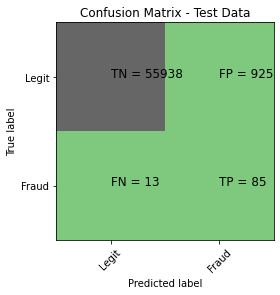

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

ROC_value: 0.9745824819912665
Threshold: 0.3939639649309754
ROC for the test dataset 97.5%


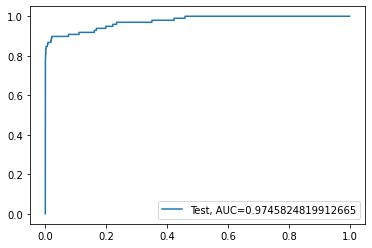

Time Taken by Model: --- 645.6076657772064 seconds ---
------------------------------------------------------------
KNN Model
KNN model score : 0.9946805709169432
Accuarcy of KNN model : 0.9946805709169432
Confusion Matrix


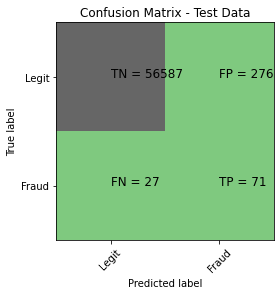

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN ROC_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


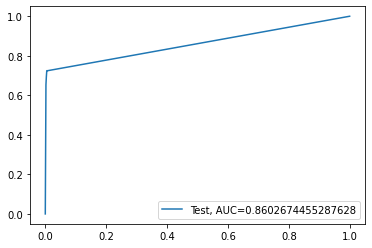

Time Taken by Model: --- 3631.1535811424255 seconds ---
------------------------------------------------------------
Decision Tree Model
Decision Tree model score : 0.9977528484401608
Accuarcy of Decision Tree model : 0.9977528484401608
Confusion Matrix


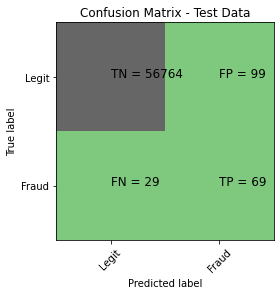

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree ROC_value: 0.8511703029874526
Decision Tree threshold: 1.0
ROC for the test dataset 85.1%


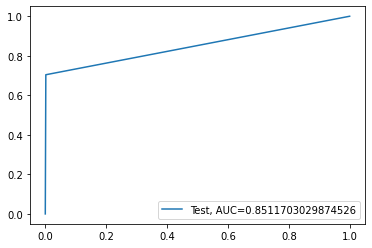

Time Taken by Model: --- 57.02263855934143 seconds ---
------------------------------------------------------------
Random Forest Model
Random Forest Model score : 0.999490879724724
Accuarcy of Decision Tree model : 0.999490879724724
Confusion Matrix


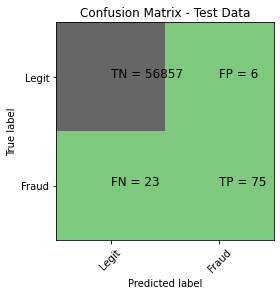

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


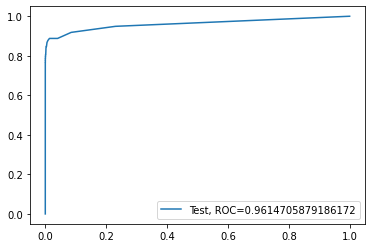

Time Taken by Model: --- 475.92179465293884 seconds ---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV "

#Run Logistic Regression Model
print("Logistic Regression Model")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Model
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_results dataframe containing consolidated results of all the runs
df_Results

,Method,Model,Accuracy,ROC_value,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression,0.998894,0.992417,0.001541
1,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
2,RepeatedKFold Cross Validation,Decision Tree,0.999105,0.869981,1.000000
3,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
4,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004295
5,StratifiedKFold Cross Validation,Logistic Regression,0.998771,0.983331,0.001571
6,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000
7,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
8,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
9,StratifiedKFold Cross Validation,SVM,0.998280,0.401770,0.001793


### Results for SMOTE Oversampling with StratifiedKFold CV:
Looking at the ROC values, we have "Logistic Regression" model which has provided the best results for SMOTE Oversampling with StratifiedKFold CV.

### <a name="p4-5">Oversampling with ADASYN Oversampler with StratifiedKFold Cross Validation</a>

In [ ]:
# Creating dataframe with ADASYN Oversampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  AOS = ADASYN(random_state=0)
  X_train_ADASYN, y_train_ADASYN = AOS.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)

Logistic Regression Model
Max ROC_AUC: 0.9835140190242668
Parameters for regularisations
[[ 0.99401512  1.05999988  0.87022392  0.95028409  0.7677663  -1.20181279
  -0.94668522 -0.58415193 -0.36273658 -0.88762346  0.79263867 -1.45318738
  -0.16511497 -1.99240543  0.14404608 -1.00140477 -1.14706361 -0.52950016
   0.38468232 -1.41770658 -0.20529884  0.71927233  0.65841389 -1.11411792
   0.71575698  0.20916613  0.14912354  1.32881214  0.01286426  0.02229345]]
[-5.11875296]
{1: array([[0.610404  , 0.63191849, 0.72150467, 0.87081578, 0.95798817,
        0.97416661, 0.97844939, 0.98148366, 0.98277305, 0.98315356,
        0.98321573, 0.98321573, 0.98322037, 0.98322037, 0.98322037,
        0.98322037, 0.98322037, 0.98322037, 0.98322037, 0.98322037],
       [0.61072194, 0.63192858, 0.72000917, 0.86805623, 0.95677094,
        0.9739103 , 0.9785645 , 0.98179965, 0.9831328 , 0.98349935,
        0.98355744, 0.98355744, 0.98355744, 0.98355744, 0.98355744,
        0.98355744, 0.98355744, 0.98355744, 

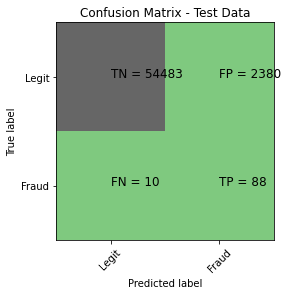

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

ROC_value: 0.9740277114310192
Threshold: 0.6115574197802307
ROC for the test dataset 97.4%


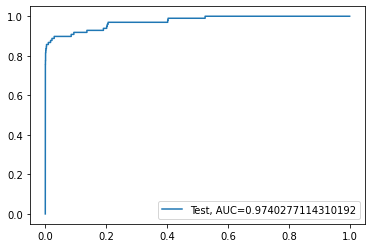

Time Taken by Model: --- 702.3103075027466 seconds ---
------------------------------------------------------------
KNN Model
KNN model score : 0.9945050122013307
Accuarcy of KNN model : 0.9945050122013307
Confusion Matrix


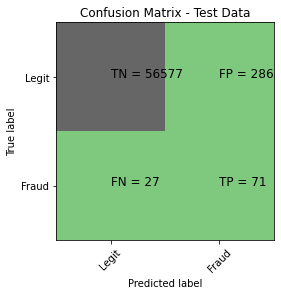

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN ROC_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


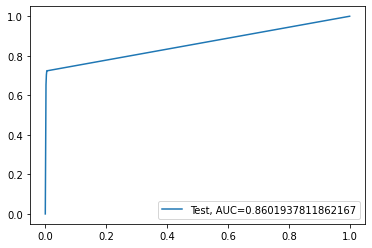

Time Taken by Model: --- 2997.0563356876373 seconds ---
------------------------------------------------------------
Decision Tree Model
Decision Tree model score : 0.9979459630273345
Accuarcy of Decision Tree model : 0.9979459630273345
Confusion Matrix


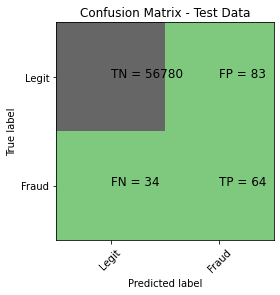

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree ROC_value: 0.8258007879303172
Decision Tree threshold: 1.0
ROC for the test dataset 82.6%


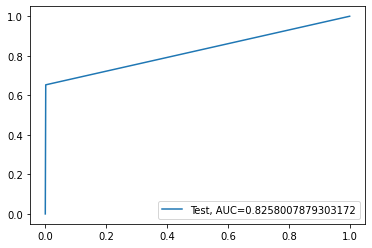

Time Taken by Model: --- 51.07482194900513 seconds ---
------------------------------------------------------------
Random Forest Model
Random Forest Model score : 0.9995259914678464
Accuarcy of Decision Tree model : 0.9995259914678464
Confusion Matrix


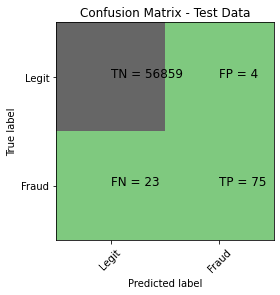

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


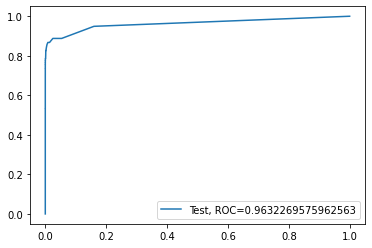

Time Taken by Model: --- 450.964647769928 seconds ---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handling = "ADASYN Oversampling with StratifiedKFold CV "

#Run Logistic Regression Model
print("Logistic Regression Model")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Model
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModel(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_results dataframe containing consolidated results of all the runs
df_Results

,Method,Model,Accuracy,ROC_value,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression,0.998894,0.992417,0.001541
1,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
2,RepeatedKFold Cross Validation,Decision Tree,0.999105,0.869981,1.000000
3,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
4,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004295
5,StratifiedKFold Cross Validation,Logistic Regression,0.998771,0.983331,0.001571
6,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000
7,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
8,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
9,StratifiedKFold Cross Validation,SVM,0.998280,0.401770,0.001793


### Results for ADASYN Oversampling with StratifiedKFold CV:
Looking at the ROC values, we have "Logistic Regression" model which has provided the best results for ADASYN Oversampling with StratifiedKFold CV.

### Overall conclusion after running all the models on Oversampled Data:
Looking at the above results, it can be seen that the "Logistic Regression" model with "Random Oversampling with StratifiedKFold CV" has provided the best results among all Oversampling methods.

## <a name="p6">Conclusion:</a>

In all oversampled models, we found that the "Logistic Regression" model for "Random Oversampling with StratifiesKFold CV" gave us the best ROC value and we got below metrices:

Logistic Regression ROC_value: 0.980297

Logistic Regression Threshold: 0.324801

However, of all the models we created, we observed that "Logistic Regression" model for "StratifiedKFold Cross Validation" gave us the best results (regardless of oversampling or undersampling).